In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [4]:
df = pd.read_csv('D:\CDAC_DBDA\Machine_Learning\Day7.csv')
df.sample(10)

,Age,EstimatedSalary,Purchased
64,59,83000,0
335,36,54000,0
350,38,113000,1
314,39,79000,0
162,37,33000,0
359,42,54000,0
384,57,33000,1
139,19,25000,0
17,45,26000,1
262,55,125000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
df.shape

(400, 3)

In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
X = df[['Age','EstimatedSalary']]
Y = df['Purchased']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
X_train

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [48]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
# Prediction
classifier.predict(sc.transform([[40,9000]]))

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

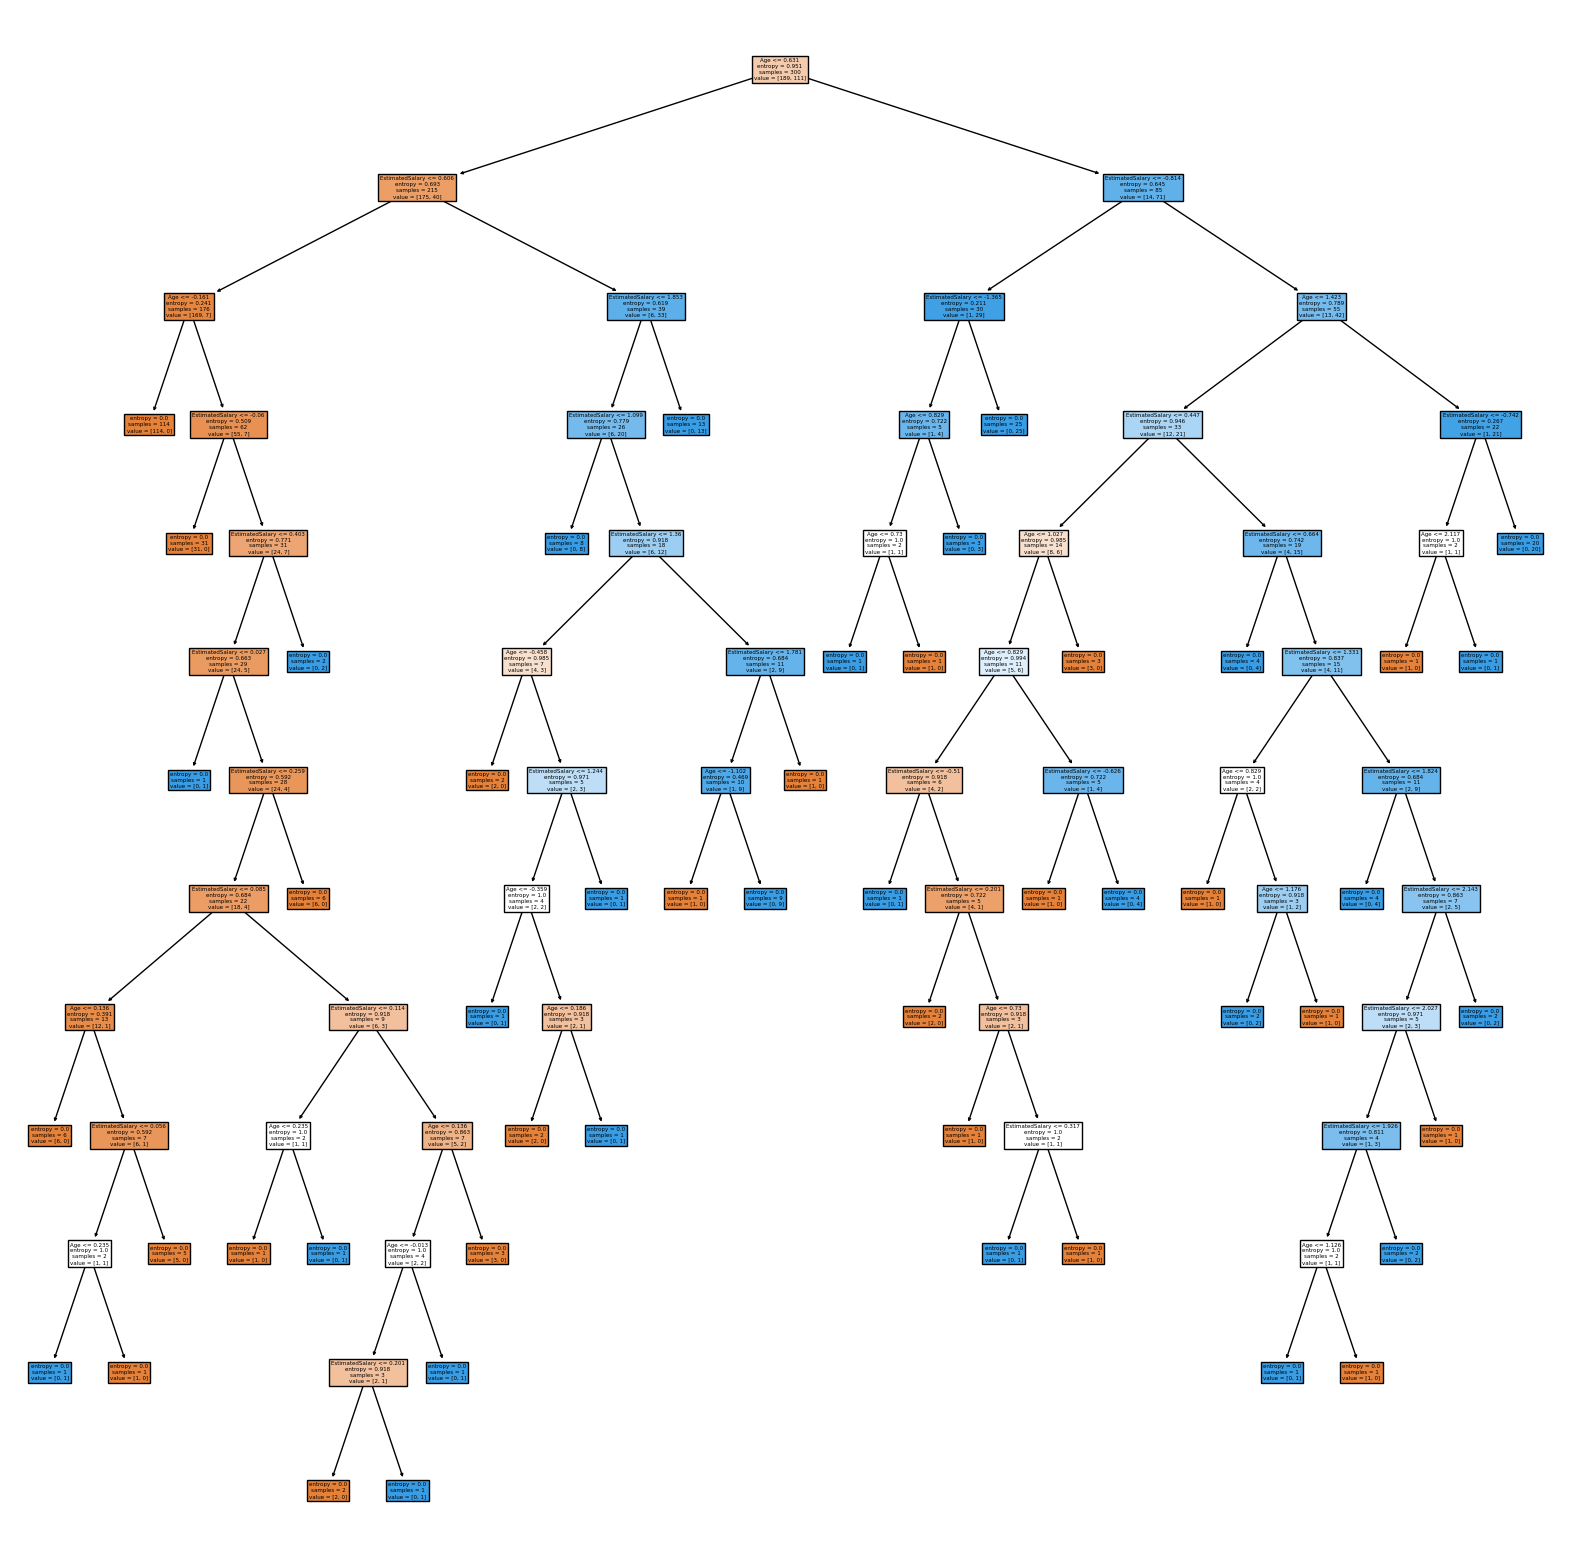

In [50]:
from sklearn import tree
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(classifier,feature_names=df.columns,filled=True)

# Random Forest Algorithm

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rand = RandomForestClassifier(n_estimators=200,criterion='entropy')
rand.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [69]:
y_pred = rand.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [71]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[62,  3],
       [ 6, 29]], dtype=int64)

In [72]:
accuracy_score(y_pred,y_test)

0.91

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [77]:
# from matplotlib.colors import ListedColormap

# # Assuming X_Set, Y_Set are your features and target
# X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

# # Create a color map
# cmap = ListedColormap(('red', 'green'))

# # Plot the decision boundary
# plt.contourf(X1, X2, rand.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = cmap)

# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# # Plot the points
# for i, j in enumerate(np.unique(Y_Set)):
#     plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
#                 color = cmap(i), label = j)

# plt.title('Random Forest Classifier (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()
